# Importance sampling of integral

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import pymc3 as pm
import math
import random
import matplotlib.mlab as mlab
from scipy.stats import gamma
from scipy.stats import gaussian_kde
import seaborn as sns
import pylab
import numpy
from sympy.functions import exp
from sympy import *
from IPython.display import display
init_printing(use_unicode=False, wrap_line=False, no_global=True)

def myFunction2(z):
    return (z*z-z+1)*gaussian2(z, 0, 2)*0.05


def gaussian2(x, mu, sigma):
    return  1/(sigma * sqrt (2 * pi)) * exp( - (x - mu)**2 / (2 * sigma**2))

w = Symbol('x')
display(myFunction2(w))
print ("Indefinite integral:")
display(integrate(myFunction2(w), w))
print ("Definite integral:")
display(integrate(myFunction2(w), (w,-oo,oo)))

Indefinite integral:


Definite integral:


0.24989971210287354 0.25093388308835185


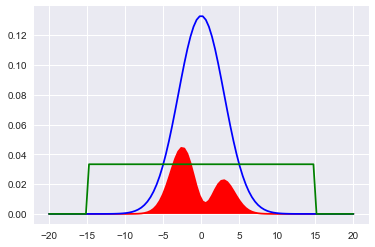

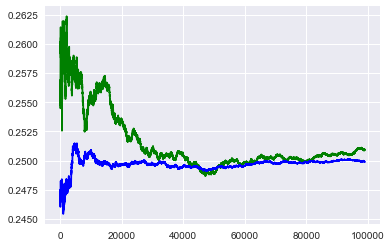

In [25]:
importanceStdDev = 3
importanceBox = 15

def myFunction(z):
    return (z*z-z+1)*gaussian(z, 0, 2)*0.05


def gaussian(x, mu, sigma):
    return  1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))



def box(q):
    return np.piecewise(q, [abs(q) > importanceBox], [0, 1/(2.0*importanceBox)])
     
x = numpy.linspace(-20,20,100) # 100 linearly spaced numbers
y2 =box(x)
y = myFunction(x)

g = gaussian(x,0,importanceStdDev)

fig = plt.figure()
plt.plot(x, y, 'r')
plt.fill_between(x, 0, y, facecolor='red')
plt.plot(x, g, 'b')
plt.plot(x, y2, 'g')

sum = 0
weight = 0

nsum = 0
nweight = 0

rs = []
nrs =[]
for i in range(0,100000):
    r = random.uniform(-importanceBox,importanceBox)
    sum+=myFunction(r)/(1./(2.*importanceBox))
    weight+=1
    rs.append(sum/weight)
    #
    n = np.random.normal(0,importanceStdDev)
    pdf = gaussian(n,0,importanceStdDev)
    nsum+=myFunction(n)/pdf
    nweight+=1
    nrs.append(nsum/nweight)

print (nsum/nweight, sum/weight)

rs = rs[1000:len(rs)-1]
nrs = nrs[1000:len(nrs)-1]

xs = numpy.linspace(0,len(rs),len(rs))

fig = plt.figure()
plt.plot(xs, rs, 'g')
plt.plot(xs, nrs, 'b')
axes = plt.gca()

plt.show()

# Rejection sampling

samples efficiency: 0.25142


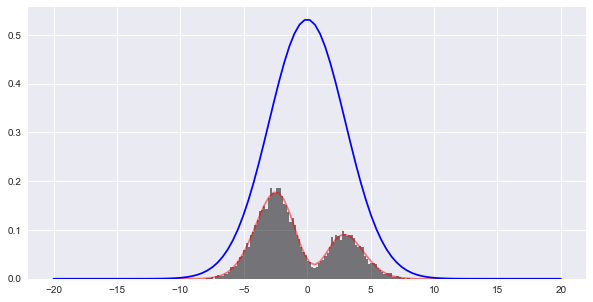

In [67]:
rejectionStdDev = 3

samples = []
count = 50000
for i in range(0,count):
    n = np.random.normal(0,rejectionStdDev)
    pdf = gaussian(n,0,rejectionStdDev)
    if (myFunction(n)/pdf > np.random.random_sample()):
         samples.append(n)

rejectionDist = gaussian(x,0,rejectionStdDev)
                        
fig = plt.figure(figsize=(10,5))
plt.plot(x, 4*y, 'r', alpha=0.5)
plt.plot(x, 4*rejectionDist, 'b')
plt.hist(samples, 100, normed=1, facecolor='black', alpha=0.5)
print ('samples efficiency:', len(samples)/count)

# Metropolis sampling

samples acceptance: 0.6914


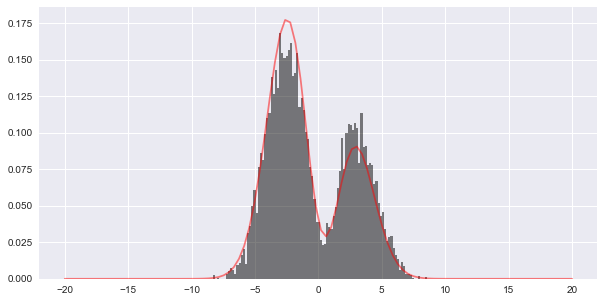

In [60]:
metropolisStdDev = 2

samples = []
count = 10000
state = 0
accepted = 0
for i in range(0,count):
    currentP = myFunction(state)
    # our proposal distribution is a gaussian (symmetric)
    proposedState = state+np.random.normal(0,metropolisStdDev)
    proposedP = myFunction(proposedState)
    
    if (proposedP/currentP>np.random.random_sample()):
        state = proposedState
        accepted=accepted+1
    
    samples.append(state)

fig = plt.figure(figsize=(10,5))
plt.plot(x, 4*y, 'r', alpha=0.5)
plt.hist(samples, 100, normed=1, facecolor='black', alpha=0.5)
print ('samples acceptance:', accepted/count)